## Finding expressions for elastic moduli

I want to find more expressions to fill in the gaps in [my matrix](http://www.subsurfwiki.org/wiki/Template:Elastic_modulus):

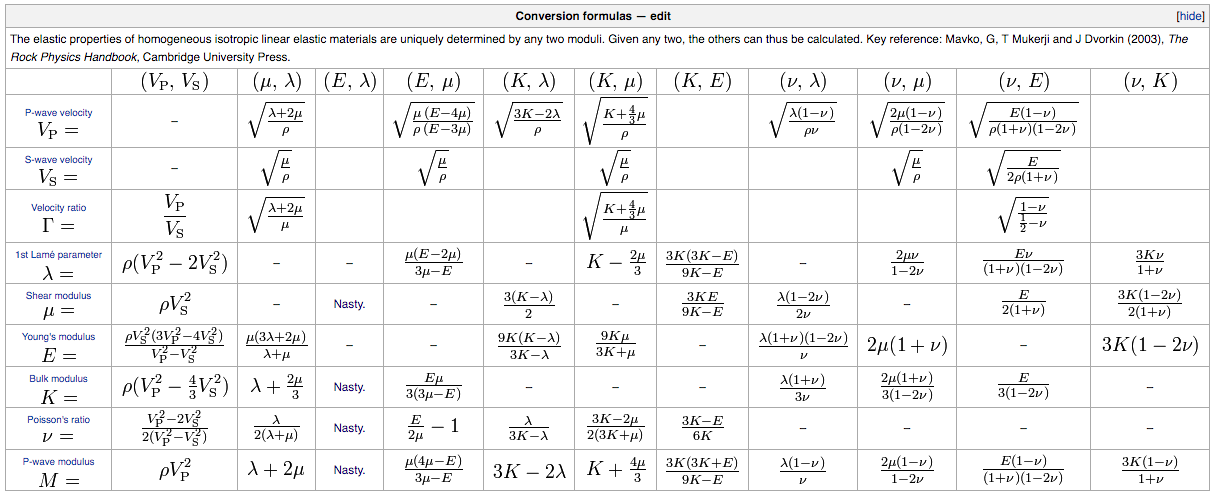

In [1]:
from IPython.display import Image
Image("data/moduli.png")

We can use [`sympy`](http://docs.sympy.org/dev/tutorial/basic_operations.html) to help!

In [2]:
import sympy
sympy.__version__

'1.0'

In [3]:
sympy.init_printing(use_latex='mathjax')

We must define our symbols. We'll use `alpha` and `beta` for Vp and Vs.

In [4]:
alpha, beta, gamma = sympy.symbols("alpha, beta, gamma")
lamda, mu, E, K, M, rho = sympy.symbols("lamda, mu, E, K, M, rho")
nu = sympy.symbols("nu")

## Expression for Vp (alpha) in terms of K, E

In [5]:
from sympy import sqrt
alpha_expr = sqrt((mu * (E - 4*mu)) / (rho * (E - 3*mu)))
alpha_expr

    _____________
   ╱ μ⋅(E - 4⋅μ) 
  ╱  ─────────── 
╲╱   ρ⋅(E - 3⋅μ) 

In [10]:
print(sympy.latex(alpha_expr))

\sqrt{\frac{\mu \left(E - 4 \mu\right)}{\rho \left(E - 3 \mu\right)}}


In [6]:
mu_expr = (3 * K * E) / (9 * K - E)

In [11]:
subs = alpha_expr.subs(mu, mu_expr)
subs

           _______________________________
          ╱          ⎛   12⋅E⋅K     ⎞     
         ╱       E⋅K⋅⎜- ──────── + E⎟     
        ╱            ⎝  -E + 9⋅K    ⎠     
√3⋅    ╱    ───────────────────────────── 
      ╱                  ⎛   9⋅E⋅K      ⎞ 
     ╱      ρ⋅(-E + 9⋅K)⋅⎜- ──────── + E⎟ 
   ╲╱                    ⎝  -E + 9⋅K    ⎠ 

In [12]:
print(sympy.latex(subs))

\sqrt{3} \sqrt{\frac{E K \left(- \frac{12 E K}{- E + 9 K} + E\right)}{\rho \left(- E + 9 K\right) \left(- \frac{9 E K}{- E + 9 K} + E\right)}}


In [41]:
from sympy import simplify
simplify(subs)

       ______________
      ╱ K⋅(E + 3⋅K)  
√3⋅  ╱  ──────────── 
   ╲╱   ρ⋅(-E + 9⋅K) 

In [9]:
print(sympy.latex(simplify(subs)))

\sqrt{3} \sqrt{\frac{K \left(E + 3 K\right)}{\rho \left(- E + 9 K\right)}}


## Expression for Vs (beta) in terms of K, E

In [13]:
beta_expr = sqrt(mu/rho)
simplify(beta_expr.subs(mu, mu_expr))

       _____________
      ╱    -E⋅K     
√3⋅  ╱  ─────────── 
   ╲╱   ρ⋅(E - 9⋅K) 

In [14]:
simpl = simplify(beta_expr.subs(mu, mu_expr))

In [15]:
print(sympy.latex(simpl))

\sqrt{3} \sqrt{- \frac{E K}{\rho \left(E - 9 K\right)}}


## Expression for Vp/Vs (gamma) in terms of K, E

In [16]:
gamma_expr = sqrt((K + (4*mu/3)) / mu)
simpl = simplify(gamma_expr.subs(mu, mu_expr))
simpl

    _________
   ╱ E + 3⋅K 
  ╱  ─────── 
╲╱      E    

In [17]:
print(sympy.latex(simpl))

\sqrt{\frac{1}{E} \left(E + 3 K\right)}


## Expression for Vp/Vs (gamma) in terms of E, mu

Not totally sure why I have to use that hacky way to get the terms to cnacel properly. 

In [18]:
gamma_emu_expr = alpha_expr / beta_expr
simpl = sqrt(gamma_emu_expr**2)
simpl

    _________
   ╱ E - 4⋅μ 
  ╱  ─────── 
╲╱   E - 3⋅μ 

In [19]:
print(sympy.latex(simpl))

\sqrt{\frac{E - 4 \mu}{E - 3 \mu}}


## Expression for Vp/Vs (gamma) in terms of PR, mu

In [20]:
e_expr = 2 * mu * (1 + nu)

In [21]:
simplify(sqrt(gamma_emu_expr.subs(E, e_expr)**2))

       _________
      ╱  ν - 1  
√2⋅  ╱  ─────── 
   ╲╱   2⋅ν - 1 

In [22]:
print(sympy.latex(simplify(sqrt(gamma_emu_expr.subs(E, e_expr)**2))))

\sqrt{2} \sqrt{\frac{\nu - 1}{2 \nu - 1}}


## Expression for Vp in terms of E, lamda

In [23]:
vp_expr = sympy.Eq(alpha, sqrt(mu*(E - 4*mu) / (rho*(E - 3*mu))))
vp_expr

        _____________
       ╱ μ⋅(E - 4⋅μ) 
α =   ╱  ─────────── 
    ╲╱   ρ⋅(E - 3⋅μ) 

In [24]:
alpha_expr = sqrt(mu*(E - 4*mu) / (rho*(E - 3*mu)))

In [25]:
mu_expr = (rho * alpha**2 - lamda)/2

In [26]:
new_expr = simplify(vp_expr.subs(mu, mu_expr))

In [27]:
new_expr.subs(alpha, alpha_expr)

                            ______________________________________________
                           ╱ ⎛     μ⋅(E - 4⋅μ)⎞ ⎛          2⋅μ⋅(E - 4⋅μ)⎞ 
    _____________         ╱  ⎜-λ + ───────────⎟⋅⎜E + 2⋅λ - ─────────────⎟ 
   ╱ μ⋅(E - 4⋅μ)         ╱   ⎝       E - 3⋅μ  ⎠ ⎝             E - 3⋅μ   ⎠ 
  ╱  ───────────  =     ╱    ──────────────────────────────────────────── 
╲╱   ρ⋅(E - 3⋅μ)       ╱              ⎛            3⋅μ⋅(E - 4⋅μ)⎞         
                      ╱             ρ⋅⎜2⋅E + 3⋅λ - ─────────────⎟         
                    ╲╱                ⎝               E - 3⋅μ   ⎠         

OK, I give up. Trying Wolfram Alpha...

In [35]:
vp_wolfram = simplify(sqrt(-lamda/rho+sqrt(9*lamda**2+E**2+2*lamda*E)/rho+E/rho)/sqrt(2))**2
sqrt(vp_wolfram)

         ________________________________
        ╱            ___________________ 
       ╱            ╱  2              2  
      ╱   E - λ + ╲╱  E  + 2⋅E⋅λ + 9⋅λ   
√2⋅  ╱    ────────────────────────────── 
   ╲╱                   ρ                
─────────────────────────────────────────
                    2                    

That's better!

In [36]:
print(sympy.latex(sqrt(vp_wolfram)))

\frac{\sqrt{2}}{2} \sqrt{\frac{1}{\rho} \left(E - \lambda + \sqrt{E^{2} + 2 E \lambda + 9 \lambda^{2}}\right)}


Another for Wolfram Alpha: Vs

    solve V = sqrt((a/(2*((y-2 r V^2)/(2 r V^2))*r)) - (a/r)) for V

In [29]:
simplify(sqrt(sqrt(9*lamda**2+2*lamda*E+E**2)/rho-(3*lamda)/rho+E/rho)/2)**2

             ___________________
            ╱  2              2 
E - 3⋅λ + ╲╱  E  + 2⋅E⋅λ + 9⋅λ  
────────────────────────────────
              4⋅ρ               

Another for Wolfram Alpha: Gamma, or Vp/Vs

    solve G = sqrt(((4/3)*a - 2*((y*G^2 - y)/3))/(a - ((y*G^2 - y)/3))) for G

In [84]:
simplify(sqrt(sqrt(9*lamda**2+2*lamda*E+E**2)/E+(3*lamda)/E+3)/sqrt(2))**2

               ___________________
              ╱  2              2 
3⋅E + 3⋅λ + ╲╱  E  + 2⋅E⋅λ + 9⋅λ  
──────────────────────────────────
               2⋅E                

## Expression for Vs (beta) in terms of nu, K

In [32]:
mu_expr = 3*K*(1 - 2*nu)/(2 + 2*nu)
simpl = simplify((sqrt(mu/rho)).subs(mu,mu_expr)**2)
simpl

-3⋅K⋅(2⋅ν - 1) 
───────────────
  2⋅ρ⋅(ν + 1)  

In [33]:
print(sympy.latex(simpl))

- \frac{3 K \left(2 \nu - 1\right)}{2 \rho \left(\nu + 1\right)}


## Expression for Vp (alpha) in terms of nu, K

In [34]:
vp_expr = sqrt(lamda * (1 - nu) / (rho * nu))
l_expr = 3 * K * nu / (1 + nu)
vp_expr.subs(lamda, l_expr)

       ____________
      ╱ K⋅(-ν + 1) 
√3⋅  ╱  ────────── 
   ╲╱   ρ⋅(ν + 1)  